In [6]:
!pip install tiktoken pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 3.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 3.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 KB 3.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 3.3 MB/s eta 0:00:0000:0100:01


In [1]:
INPUT_CSV_FILE = "output.csv"

In [2]:
import pandas as pd

table = pd.read_csv(INPUT_CSV_FILE)
table

,title,url,html
0,Whey Protein Deluxe | ALDI ONLINESHOP,https://www.aldi-onlineshop.de/p/whey-protein-...,Für den Versand von Artikeln aus dem ALDI ONLI...
1,"Romeo Wild Roots Hunde-Nassfutter, 12 x 400 g ...",https://www.aldi-onlineshop.de/p/wild-roots-hu...,Für den Versand von Artikeln aus dem ALDI ONLI...
2,"Catit Katzensnack, 50er-Pack | ALDI ONLINESHOP",https://www.aldi-onlineshop.de/p/katzensnack-c...,Für den Versand von Artikeln aus dem ALDI ONLI...
3,"Catit Katzensnack, 50er-Pack | ALDI ONLINESHOP",https://www.aldi-onlineshop.de/p/katzensnack-c...,Für den Versand von Artikeln aus dem ALDI ONLI...
4,Catit Go Natural Katzen-Erbsenstreu | ALDI ONL...,https://www.aldi-onlineshop.de/p/katzen-erbsen...,Für den Versand von Artikeln aus dem ALDI ONLI...
...,...,...,...
2312,"Novitesse Gästehandtuch Hoch/Tief, 2 x 4er Pac...",https://www.aldi-onlineshop.de/p/gaestehandtuc...,Für den Versand von Artikeln aus dem ALDI ONLI...
2313,"Novitesse Gästehandtuch Hoch/Tief, 2 x 4er Pac...",https://www.aldi-onlineshop.de/p/gaestehandtuc...,Für den Versand von Artikeln aus dem ALDI ONLI...
2314,"Novitesse Gästehandtuch Hoch/Tief, 2 x 4er Pac...",https://www.aldi-onlineshop.de/p/gaestehandtuc...,Für den Versand von Artikeln aus dem ALDI ONLI...
2315,Samsung Smartphone Galaxy A14 5G | ALDI ONLINE...,https://www.aldi-onlineshop.de/p/smartphone-ga...,Für den Versand von Artikeln aus dem ALDI ONLI...


In [3]:
import tiktoken

encoder = tiktoken.encoding_for_model("gpt-3.5-turbo")

table["token_size"] = table["html"].apply(lambda x: len(encoder.encode(x)))

In [4]:
table.describe()

,token_size
count,2317.000000
mean,2021.802762
std,350.623163
min,916.000000
25%,1816.000000
50%,1959.000000
75%,2191.000000
max,3933.000000


array([[<Axes: title={'center': 'token_size'}>]], dtype=object)

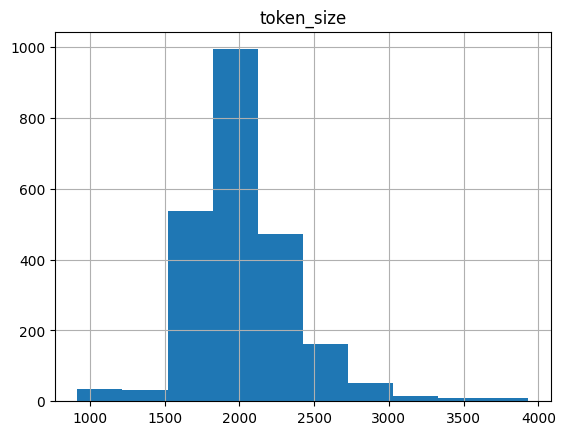

In [7]:
table.hist(column=["token_size"])